# **IMAGENET - ResNet50  - NESNE TANIMA**


---
[<img align="right" width="100" height="100" src="http://www.i2symbol.com/images/symbols/style-letters/circled_latin_capital_letter_a_u24B6_icon_128x128.png">](https://www.ayyucekizrak.com/)



**Gerekli paketler yükleniyor...**

In [0]:
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

Using TensorFlow backend.


**ImageNet veriseti ile eğitilmiş model ve ağırlıkları yükleniyor...**

In [0]:
model = ResNet50(weights="imagenet")

102858752/102853048 [==============================] - 7s 0us/step


**Resmi girişe uygun formata getirmek için yeniden boyutlandırma fonksiyonu tanımlanıyor**

In [0]:
def prepare_image(image, target):
	# giriş görüntüsünü yeniden boyutlandırma ve ön işlemerin yapılması
	image = image.resize(target)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
	image = imagenet_utils.preprocess_input(image)

	# işlenmiş görüntüyü alma
	return image

## **Sınıflandırma istediğiniz resmin web adresini aşağıdaki giirş alanına giriniz**

In [0]:
#@title Default title text { vertical-output: true }
ImageURL = "https://i.cnnturk.com/ps/cnnturk/75/650x0/57ad7dd9a781b6264026292d.jpg" #@param {type:"string"}


**Girilen web adresinden resim indiriliyor**

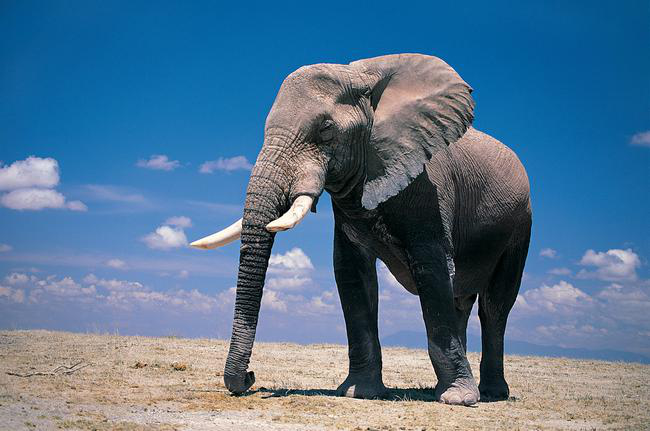

In [0]:
#ImageURL = "https://i.cnnturk.com/ps/cnnturk/75/650x0/57ad7dd9a781b6264026292d.jpg"
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

**Eğitilmiş model ile sınıflandırma yapılıyor.**

In [0]:
data = {"success": False}

pre_image = prepare_image(image, target=(224, 224)) # 224 x 224 boyutlu hale getir

preds = model.predict(pre_image) # Kesirim modeline ön işlemden geçmiş görüntüyü uygula

results = imagenet_utils.decode_predictions(preds) #kestirim
data["predictions"] = []


for (imagenetID, label, prob) in results[0]: # ImageNet veri kümseinden etiket, olasılık ve kestrim sonucunu al
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)
  
data["success"] = True

print(data)

{'success': True, 'predictions': [{'label': 'African_elephant', 'probability': 0.6730425357818604}, {'label': 'tusker', 'probability': 0.18517249822616577}, {'label': 'Indian_elephant', 'probability': 0.07864938676357269}, {'label': 'Arabian_camel', 'probability': 0.034435611218214035}, {'label': 'bison', 'probability': 0.003440132364630699}]}


In [0]:
print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1}'dır.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"])) 
# En yüksek olasılıklı sonucu ekrana yazdır


Sınıflandırma tahmini en yüksek olan 0.6730425357818604 oranıyla African_elephant'dır.
